In [2]:
# dataset source:   https://www.kaggle.com/datasets/andreinovikov/used-cars-dataset

<div style="text-align: center;background-color:#f0e9d5; padding:10px; border-left: 5px solid #4CAF50; font-family: Trebuchet MS; font-size: 20px; color: #333;">
  LOAD LIBRARY & DATASET
</div>


In [384]:

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from scipy.stats import gaussian_kde

In [385]:
data = pd.read_csv("../datasets/cars.csv")

In [386]:
data.shape

(762091, 20)

In [387]:
# from IPython.display import display

def columns_info(data):
    """
    Display a table showing the number of unique values for each column in the DataFrame.
    """
    unique_counts = {
        "Column": data.columns,
        "Unique Values": [data[col].nunique() for col in data.columns],
        'null values': [data[col].isna().sum() for col in data.columns]
    }
    
    result_df = pd.DataFrame(unique_counts)
    display(result_df)
columns_info(data)

,Column,Unique Values,null values
0,manufacturer,30,0
1,model,12187,0
2,year,100,0
3,mileage,158751,506
4,engine,6903,15050
5,transmission,1313,9904
6,drivetrain,33,21562
7,fuel_type,36,22927
8,mpg,865,142071
9,exterior_color,7681,8859


In [388]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762091 entries, 0 to 762090
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   manufacturer         762091 non-null  object 
 1   model                762091 non-null  object 
 2   year                 762091 non-null  int64  
 3   mileage              761585 non-null  float64
 4   engine               747041 non-null  object 
 5   transmission         752187 non-null  object 
 6   drivetrain           740529 non-null  object 
 7   fuel_type            739164 non-null  object 
 8   mpg                  620020 non-null  object 
 9   exterior_color       753232 non-null  object 
 10  interior_color       705116 non-null  object 
 11  accidents_or_damage  737879 non-null  float64
 12  one_owner            730608 non-null  float64
 13  personal_use_only    737239 non-null  float64
 14  seller_name          753498 non-null  object 
 15  seller_rating    

In [389]:
data.describe()

,year,mileage,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price
count,762091.000000,7.615850e+05,737879.000000,730608.000000,737239.000000,548118.000000,730459.000000,762091.000000,410112.000000,7.620910e+05
mean,2017.791398,5.578169e+04,0.228616,0.561969,0.657212,4.158568,4.623523,89.550900,1007.467068,3.648898e+04
std,5.110532,4.355788e+04,0.419942,0.496145,0.474642,0.805741,0.276902,115.082266,1375.122208,1.984183e+06
min,1915.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,100.000000,1.000000e+00
25%,2016.000000,2.328700e+04,0.000000,0.000000,0.000000,3.800000,4.500000,14.000000,380.000000,1.958300e+04
50%,2019.000000,4.559600e+04,0.000000,1.000000,1.000000,4.500000,4.700000,51.000000,642.000000,2.798900e+04
75%,2021.000000,7.836500e+04,0.000000,1.000000,1.000000,4.700000,4.800000,119.000000,1007.000000,3.948800e+04
max,2024.000000,1.119067e+06,1.000000,1.000000,1.000000,5.000000,5.000000,1025.000000,170995.000000,1.000000e+09


<div style="text-align: center;background-color:#f0e9d5; padding:10px; border-left: 5px solid #4CAF50; font-family: Trebuchet MS; font-size: 20px; color: #333;">
  Data Cleaning & Visualization
    
</div>

In [390]:
data.duplicated().sum()
data.drop_duplicates()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,Iconic Coach,NaN,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,NaN,0.0,1.0,1.0,Apple Tree Acura,NaN,4.4,12.0,675.0,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,NaN,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762086,Volvo,S60 B5 Momentum,2022,22877.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,25-33,Bright Silver Metallic,Blond,0.0,1.0,0.0,Volvo Cars Danbury,4.2,4.2,2.0,250.0,34798.0
762087,Volvo,S60 T5,2012,72900.0,250.0HP 2.5L 5 Cylinder Engine Gasoline Fuel,A/T,Front-wheel Drive,Gasoline,NaN,Red,Beige,NaN,NaN,NaN,NaN,NaN,4.5,101.0,NaN,12500.0
762088,Volvo,S60 T5,2014,92000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,Front-wheel Drive,Gasoline,21-30,Ice White,Soft Beige,0.0,0.0,1.0,Dapper Car Sales,NaN,4.8,36.0,300.0,12299.0
762089,Volvo,S60 T5 Platinum,2013,132000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,All-wheel Drive,Gasoline,20-29,Ice White,Off Black,1.0,0.0,0.0,Legend Auto Sales Inc.,4.6,4.7,62.0,1000.0,8995.0


#### drop row if it has more than 13 null values

In [391]:
rows_to_drop = (data.isnull().sum(axis=1) > 13).sum()
print(f"Rows with >13 nulls: {rows_to_drop}")

Rows with >13 nulls: 0


In [392]:
bool_cols = ['accidents_or_damage', 'one_owner', 'personal_use_only']

data[bool_cols] = data[bool_cols].fillna(-1)  ## here we fill with -1 to maintain datatype float. otherwise it will be object type.

In [393]:
# Fill missing values with 'Unknown' in specified columns
data[['exterior_color', 'interior_color', 'seller_name']] = data[['exterior_color', 'interior_color', 'seller_name']].fillna('Unknown')

In [394]:
data['transmission'].nunique()

1313

In [395]:
### drop row if all mentioned column has null.
data.dropna(subset=['engine', 'fuel_type','transmission'], how='all', inplace=True)

### check for null
both_null = data[data['engine'].isnull() & data['fuel_type'].isnull()& data['transmission'].isnull() ]
print("Number of rows where both 'engine', transmission and 'fuel_type' are null:", len(both_null))

Number of rows where both 'engine', transmission and 'fuel_type' are null: 0


In [396]:
data.dropna(subset=['engine', 'fuel_type'], how='all', inplace=True)
both_null = data[data['engine'].isnull() & data['fuel_type'].isnull()]
len(both_null)

0

### 'Enigne'. clean & process 

In [397]:
# engine_array = data['engine'].unique()

# import json

# with open('Engine.json', 'w') as filehandle:
#     json.dump(engine_array.tolist(), filehandle)


In [398]:
data['engine'] = data['engine'].str.upper()

In [399]:
import re

def extract_engine_attributes(text):
    if pd.isna(text) or str(text).strip() == "":
        return {
            "ENGINE_SIZE": "NaN",
            "CYLINDERS": "NaN",
            "VALVES": "NaN",
            "ASPIRATION": "NaN",
            "FUEL_TYPE": "NaN",
            "INJECTION_SYSTEM": "NaN",
            "CONFIGURATION": "NaN",
            "HORSEPOWER": "NaN"
        }

    text = str(text).upper()

    return {
        "ENGINE_SIZE": re.search(r"\d+(\.\d+)?L", text),
        "CYLINDERS": re.search(r"(V\d|I\d|W\d|INLINE\s?\d|STRAIGHT\s?\d)", text),
        "VALVES": re.search(r"\d+V", text),
        "ASPIRATION": re.search(r"(TWIN TURBO|TURBOCHARGER|TURBO|SUPERCHARGED|SUPERCHARGER|NATURAL ASPIRATION)", text),
        "FUEL_TYPE": re.search(r"(GASOLINE|DIESEL|ELECTRIC|HYBRID|FLEX FUEL|ETHANOL|UNLEADED)", text),
        "INJECTION_SYSTEM": re.search(r"(MPFI|SPFI|PGM-FI|GDI|DDI|PDI|DI|FSI|SIDI|EFI|SEFI|TFSI|SMPI|MFI)", text),
        "CONFIGURATION": re.search(r"(SOHC|DOHC|OHV|VVT|VTC|VANOS|VALVETRONIC|TIMING)", text),
        "HORSEPOWER": re.search(r"\d+(\.\d+)?HP", text)
    }

# Apply extraction → expand into new DataFrame
attr_df = data["engine"].apply(lambda x: pd.Series(extract_engine_attributes(x)))

# Convert regex match objects → actual strings
for col in attr_df.columns:
    attr_df[col] = attr_df[col].apply(lambda x: x.group(0) if x and hasattr(x, "group") else ("NaN" if x != "NaN" else "NaN"))

# Merge new columns into original DataFrame
data = pd.concat([data, attr_df], axis=1)

# Now "data" has separate Series for each category, with "NaN" for missing values




In [400]:
data.head(10)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,price_drop,price,ENGINE_SIZE,CYLINDERS,VALVES,ASPIRATION,FUEL_TYPE,INJECTION_SYSTEM,CONFIGURATION,HORSEPOWER
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 I-VTEC VARIABLE VALVE CONTROL, ENGINE...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,...,300.0,13988.0,1.5L,NaN,NaN,NaN,NaN,NaN,NaN,90HP
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC HYBRID,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,...,NaN,17995.0,1.5L,I4,8V,NaN,HYBRID,MPFI,SOHC,NaN
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC HYBRID,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,...,500.0,17000.0,1.5L,I4,8V,NaN,HYBRID,MPFI,SOHC,NaN
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC HYBRID,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,...,675.0,14958.0,1.5L,I4,8V,NaN,HYBRID,MPFI,SOHC,NaN
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC HYBRID,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Unknown,...,300.0,14498.0,1.5L,I4,8V,NaN,HYBRID,MPFI,SOHC,NaN
5,Acura,ILX Hybrid 1.5L,2013,62042.0,1.5L I4 8V MPFI SOHC HYBRID,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,...,109.0,18000.0,1.5L,I4,8V,NaN,HYBRID,MPFI,SOHC,NaN
6,Acura,ILX Hybrid 1.5L,2013,57212.0,1.5L I4 8V MPFI SOHC HYBRID,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Silver,...,NaN,15999.0,1.5L,I4,8V,NaN,HYBRID,MPFI,SOHC,NaN
7,Acura,ILX Hybrid 1.5L,2014,214000.0,111.0HP 1.5L 4 CYLINDER ENGINE GASOLINE/MILD E...,A/T,Front-wheel Drive,Hybrid,NaN,White,...,NaN,8500.0,1.5L,NaN,NaN,NaN,GASOLINE,NaN,NaN,111.0HP
8,Acura,ILX Hybrid 1.5L,2013,61539.0,1.5L I4 8V MPFI SOHC HYBRID,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Silver,...,NaN,16950.0,1.5L,I4,8V,NaN,HYBRID,MPFI,SOHC,NaN
9,Acura,NSX,1993,62018.0,3.0L V6 24V SPFI DOHC,5-Speed Manual,NaN,Gasoline,19-24,Formula Red,...,NaN,84995.0,3.0L,V6,24V,NaN,NaN,SPFI,DOHC,NaN


In [403]:
columns_info(data)

,Column,Unique Values,null values
0,manufacturer,30,0
1,model,11916,0
2,year,99,0
3,mileage,158699,494
4,engine,6808,3600
5,transmission,1298,5449
6,drivetrain,28,11929
7,fuel_type,36,11477
8,mpg,865,130837
9,exterior_color,7589,0


In [452]:
data = data.replace('NaN', np.nan)

In [453]:
data['fuel_type'] =  data['fuel_type'].str.upper()

In [454]:
data['fuel_type'] = data['fuel_type'].fillna(data['FUEL_TYPE'])

In [455]:
fuel_type_mapping = {
    'Gasoline': 'Gasoline',
    'GASOLINE': 'Gasoline',
    'Gas': 'Gasoline',
    'Gasoline Fuel': 'Gasoline',
    'UNLEADED': 'Gasoline',
    'Regular Unleaded': 'Gasoline',
    'Premium': 'Gasoline',
    'Premium (Required)': 'Gasoline',
    'Premium Unleaded': 'Gasoline',
    'G': 'Gasoline',

    'Diesel': 'Diesel',
    'DIESEL': 'Diesel',
    'Diesel Fuel': 'Diesel',

    'Electric': 'Electric',
    'ELECTRIC': 'Electric',
    'Electric Fuel System': 'Electric',

    'Hybrid': 'Hybrid',
    'HYBRID': 'Hybrid',
    'Hybrid Fuel': 'Hybrid',
    'Gasoline/Mild Electric Hybrid': 'Hybrid',
    'Gas/Electric Hybrid': 'Hybrid',

    'Plug-In Hybrid': 'Plug-In Hybrid',
    'Plug-In Electric/Gas': 'Plug-In Hybrid',
    'PHEV': 'Plug-In Hybrid',

    'Flex Fuel': 'Flex Fuel',
    'FLEX FUEL': 'Flex Fuel',
    'Flexible Fuel': 'Flex Fuel',
    'Flex Fuel Capability': 'Flex Fuel',
    'E85 Flex Fuel': 'Flex Fuel',
    'E85 Fl': 'Flex Fuel',

    'Compressed Natural Gas': 'CNG',
    'Natural Gas': 'CNG',
    'Gaseous': 'CNG',

    'Bi-Fuel': 'Bi-Fuel',

    'Biodiesel': 'Biodiesel',
    'Bio Diesel': 'Biodiesel',
    'B': 'Biodiesel',

    'Hydrogen Fuel Cell': 'Hydrogen',

    'Other': 'Other',
    'Automatic': 'Other',

    'Unknown': 'Other',
    'Unspecified': 'Other',

    None: 'Other',
    float('nan'): 'Other'
}

data['fuel_type'] = data['fuel_type'].map(fuel_type_mapping)

In [456]:

data['fuel_type'].unique()

array(['Gasoline', 'Hybrid', 'Other', 'Electric', 'Diesel', 'Flex Fuel',
       nan], dtype=object)

In [457]:
data['FUEL_TYPE'].unique()

array([nan, 'HYBRID', 'GASOLINE', 'ELECTRIC', 'UNLEADED', 'DIESEL',
       'FLEX FUEL', 'ETHANOL'], dtype=object)

In [479]:
# engine_size_mapping = {
#     '0.0L': '0.0L',
#     '0.65L': '0.7L',
#     '1.0L': '1.0L',
#     '1L': '1.0L',
#     '1.1L': '1.1L',
#     '1.2L': '1.2L',
#     '1.3L': '1.3L',
#     '1.4L': '1.4L',
#     '1.5L': '1.5L',
#     '1.6L': '1.6L',
#     '1.7L': '1.7L',
#     '1.79L': '1.8L',
#     '1.8L': '1.8L',
#     '1.9L': '1.9L',
#     '1.99L': '2.0L',
#     '2.0L': '2.0L',
#     '2L': '2.0L',
#     '2.1L': '2.1L',
#     '2.2L': '2.2L',
#     '2.25L': '2.3L',
#     '2.3L': '2.3L',
#     '2.4L': '2.4L',
#     '2.5L': '2.5L',
#     '2.6L': '2.6L',
#     '2.7L': '2.7L',
#     '2.8L': '2.8L',
#     '2.9L': '2.9L',
#     '3.0L': '3.0L',
#     '3L': '3.0L',
#     '3.00L': '3.0L',
#     '3.1L': '3.1L',
#     '3.2L': '3.2L',
#     '3.3L': '3.3L',
#     '3.4L': '3.4L',
#     '3.5L': '3.5L',
#     '3.6L': '3.6L',
#     '3.7L': '3.7L',
#     '3.8L': '3.8L',
#     '3.9L': '3.9L',
#     '4.0L': '4.0L',
#     '4L': '4.0L',
#     '4.1L': '4.1L',
#     '4.2L': '4.2L',
#     '4.3L': '4.3L',
#     '4.4L': '4.4L',
#     '4.5L': '4.5L',
#     '4.6L': '4.6L',
#     '4.7L': '4.7L',
#     '4.8L': '4.8L',
#     '4.9L': '4.9L',
#     '5.0L': '5.0L',
#     '5L': '5.0L',
#     '5.1L': '5.1L',
#     '5.2L': '5.2L',
#     '5.3L': '5.3L',
#     '5.4L': '5.4L',
#     '5.5L': '5.5L',
#     '5.6L': '5.6L',
#     '5.7L': '5.7L',
#     '5.8L': '5.8L',
#     '5.9L': '5.9L',
#     '6.0L': '6.0L',
#     '6L': '6.0L',
#     '6.1L': '6.1L',
#     '6.2L': '6.2L',
#     '6.3L': '6.3L',
#     '6.4L': '6.4L',
#     '6.5L': '6.5L',
#     '6.6L': '6.6L',
#     '6.7L': '6.7L',
#     '6.8L': '6.8L',
#     '7.0L': '7.0L',
#     '7L': '7.0L',
#     '7.2L': '7.2L',
#     '7.3L': '7.3L',
#     '7.4L': '7.4L',
#     '7.5L': '7.5L',
#     '8.0L': '8.0L',
#     '8L': '8.0L',
#     '8.1L': '8.1L',
#     '8.2L': '8.2L',
#     '8.3L': '8.3L',
#     '8.4L': '8.4L',
#     '39.5L': '0.7L',  

#     np.nan: np.nan  
# }
# data['ENGINE_SIZE'] = data['ENGINE_SIZE'].map(engine_size_mapping)
# data['ENGINE_SIZE'].value_counts()

In [480]:
def extract_engine_size(val):
    try:
        return float(str(val).lower().replace('l', '').strip())
    except:
        return np.nan

data['ENGINE_SIZE_FLOAT'] = data['ENGINE_SIZE'].apply(extract_engine_size)

bins = np.arange(0, 10, 1)  # 0-1L, 1-2L, ..., 8-9L
labels = [f'{i}-{i+1}L' for i in bins[:-1]]
data['ENGINE_SIZE_GROUP'] = pd.cut(data['ENGINE_SIZE_FLOAT'], bins=bins, labels=labels, right=False)

# View result
data['ENGINE_SIZE_GROUP'].value_counts()

ENGINE_SIZE_GROUP
2-3L    273723
3-4L    220730
1-2L     88498
5-6L     49284
6-7L     45485
4-5L     29541
7-8L       705
8-9L       238
0-1L        72
Name: count, dtype: int64

In [481]:
data['CYLINDERS'].unique()

array([nan, 'I4', 'V6', 'I5', 'V8', 'V1', 'W1', 'I6', 'STRAIGHT 6',
       'INLINE 2', 'INLINE 6', 'INLINE 4', 'I3', 'V4', 'V3', 'I8',
       'STRAIGHT 8', 'W5', 'V0', 'W8', 'INLINE 5'], dtype=object)

In [483]:
engine_cylinders_mapping = {
    'I3': 'I3',
    'I4': 'I4',
    'I5': 'I5',
    'I6': 'I6',
    'I8': 'I8',

    'INLINE 2': 'I2',
    'INLINE 4': 'I4',
    'INLINE 5': 'I5',
    'INLINE 6': 'I6',
    'STRAIGHT 6': 'I6',
    'STRAIGHT 8': 'I8',

    'V3': 'V3',
    'V4': 'V4',
    'V6': 'V6',
    'V8': 'V8',
    'V1': 'Other',  # questionable
    'V0': 'Other',  # invalid

    'W1': 'Other',
    'W5': 'W5',
    'W8': 'W8',

    np.nan: np.nan,
    None: np.nan
}
data['CYLINDERS'] = data['CYLINDERS'].map(engine_cylinders_mapping)
data['CYLINDERS'].value_counts()

CYLINDERS
I4    296663
V6    199791
V8     96863
I6     23858
I3      7446
I5      1853
V4         5
I8         4
V3         3
W8         2
W5         1
Name: count, dtype: int64

In [414]:
valve_mapping = {
    '2V': '2V',
    '3V': '3V',
    '4V': '4V',
    '8V': '8V',
    '10V': '10V',
    '12V': '12V',
    '16V': '16V',
    '18V': '18V',
    '20V': '20V',
    '24V': '24V',
    '30V': '30V',
    '32V': '32V',
    '36V': '36V',
    '40V': '40V',
    '48V': '48V',

    '697V': np.nan,  # Invalid entry
    np.nan: np.nan,
    None: np.nan
}
data['VALVES'] = data['VALVES'].map(valve_mapping)
data['VALVES'].unique()

array([nan, '8V', '24V', '16V', '20V', '32V', '40V', '30V', '48V', '12V',
       '4V', '18V', '3V', '2V', '36V', '10V'], dtype=object)

In [415]:
data['ASPIRATION'].unique()

array([nan, 'TWIN TURBO', 'TURBO', 'TURBOCHARGER', 'NATURAL ASPIRATION',
       'SUPERCHARGED', 'SUPERCHARGER'], dtype=object)

In [416]:
data['INJECTION_SYSTEM'].unique()

array([nan, 'MPFI', 'SPFI', 'PDI', 'DI', 'GDI', 'PGM-FI', 'FSI', 'TFSI',
       'DDI', 'SMPI', 'SEFI', 'EFI', 'SIDI', 'MFI'], dtype=object)

In [417]:
data['CONFIGURATION'].unique()

array([nan, 'SOHC', 'DOHC', 'OHV', 'TIMING', 'VANOS', 'VVT'], dtype=object)

In [ ]:
import numpy as np

engine_columns = [
    'ENGINE_SIZE',
    'CYLINDERS',
    'VALVES',
    'ASPIRATION',
    # 'FUEL_TYPE',
    'INJECTION_SYSTEM',
    'CONFIGURATION',
    # 'HORSEPOWER'
]

# Create empty column first
data['ENGINE_DETAILS'] = np.nan

# Only build ENGINE_DETAILS where at least one engine column is not null
mask = data[engine_columns].notna().any(axis=1)

# For those rows, fill NaNs with '', convert to str, join
data.loc[mask, 'ENGINE_DETAILS'] = (
    data.loc[mask, engine_columns]
    .fillna('')
    .astype(str)
    .agg(' '.join, axis=1)
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
)



C:\Users\Kartik\AppData\Local\Temp\ipykernel_16360\678147172.py:21: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['1.5L 90HP' '1.5L I4 8V HYBRID MPFI SOHC' '1.5L I4 8V HYBRID MPFI SOHC'
 ... '2.5L I5 20V TURBO MPFI DOHC' '2.5L I5 20V TURBO MPFI DOHC'
 '2.5L I5 20V TURBO MPFI DOHC']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [425]:
data['ENGINE_DETAILS'].unique()

array(['1.5L 90HP', '1.5L I4 8V HYBRID MPFI SOHC',
       '1.5L GASOLINE 111.0HP', ..., '2.5L I5 20V TURBO',
       '2.3L GASOLINE 247.0HP', '2.0L I4 TURBO 250HP'],
      shape=(3665,), dtype=object)

In [382]:
data['CYLINDERS'].isnull().sum()

np.int64(0)

In [430]:
 data['VALVES'].isnull().sum()

np.int64(119903)

In [445]:
### drop row if all mentioned column has null.
data.dropna(subset=['engine', 'ENGINE_DETAILS'], how='all', inplace=True)

### check for null
both_null = data[data['engine'].isnull() & data['ENGINE_DETAILS'].isnull()]
print("Number of rows where both 'engine', transmission and 'fuel_type' are null:", len(both_null))

Number of rows where both 'engine', transmission and 'fuel_type' are null: 0


In [459]:
columns_info(data)

,Column,Unique Values,null values
0,manufacturer,30,0
1,model,11818,0
2,year,98,0
3,mileage,158672,494
4,engine,6808,0
5,transmission,1292,2750
6,drivetrain,27,8765
7,fuel_type,6,1613
8,mpg,865,127438
9,exterior_color,7549,0


In [466]:
data['transmission']= data['transmission'].str.lower().str.strip()

In [ ]:
def map_transmission(trans):

    if pd.isnull(trans):
        return 'Unknown'
    
    trans = trans.lower()
    if 'manual' in trans or 'm/t' in trans or '5-spd w/overdrive' in trans or '5-speed manual' in trans or '6 speed manual' in trans or 'manual 5-speed' in trans or 'stick' in trans or '4+3 manual' in trans or 'tremec' in trans or 'muncie' in trans or 'on the tree' in trans :
        return 'Manual'
    
    elif 'automatic' in trans or 'auto' in trans or 'a/t' in trans or 'a' in trans or '6-spd seq sptshft' in trans or '7-spd S trnc Spt' in trans or '8-speed' in trans or 'geartronic' in trans or 'steptronic' in trans or 'shiftronic' in trans or 'tiptronic' in trans or 'powershift' in trans or 'selectshift' in trans or 'torqshift' in trans or 'hydramatic' in trans or 'speedshift' in trans: 
        return 'Automatic'
    
    elif ('cvt' in trans or 'continuously variable' in trans or 
          'ecvt' in trans or 'ivt' in trans or 
          'xtronic' in trans or 'multitronic' in trans or 
          'lineartronic' in trans or 'variabl' in trans):
        return 'CVT'
    
    elif 'semi' in trans or 'sequential' in trans or 'w/dual' in trans or 'smg' in trans or 'autostick' in trans:
        return 'Semi-Automatic'
    

    elif 'dual' in trans or 'dct' in trans or 'dual clutch' in trans or 'dual-clutch' in trans or 'double clutch' in trans or 's tronic' in trans or 'pdk' in trans or 'dsg' in trans:
        return 'Dual-Clutch'
    
    elif 'tiptronic' in trans or 'shiftable' in trans or  'geartronic' in trans:
        return 'Automatic'
    
    elif ('select' in trans or 'not specified' in trans or 
          'unspecified' in trans or 'unknown' in trans or 
          'other' in trans or trans.strip() in ['a', 'nan']):
        return 'Unknown'

    else:
        return 'Unknown'
data['transmission_category'] = data['transmission'].apply(map_transmission)
data['transmission_category'].value_counts()

transmission_category
Automatic         716442
Manual             23716
Unknown             4575
CVT                 2258
Dual-Clutch           49
Semi-Automatic         1
Name: count, dtype: int64

AttributeError: 'numpy.ndarray' object has no attribute 'str'

In [427]:
data.head(20)


,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,price,ENGINE_SIZE,CYLINDERS,VALVES,ASPIRATION,FUEL_TYPE,INJECTION_SYSTEM,CONFIGURATION,HORSEPOWER,ENGINE_DETAILS
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 I-VTEC VARIABLE VALVE CONTROL, ENGINE...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,...,13988.0,1.5L,NaN,NaN,NaN,NaN,NaN,NaN,90HP,1.5L 90HP
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC HYBRID,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,...,17995.0,1.5L,I4,8V,NaN,HYBRID,MPFI,SOHC,NaN,1.5L I4 8V HYBRID MPFI SOHC
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC HYBRID,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,...,17000.0,1.5L,I4,8V,NaN,HYBRID,MPFI,SOHC,NaN,1.5L I4 8V HYBRID MPFI SOHC
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC HYBRID,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,...,14958.0,1.5L,I4,8V,NaN,HYBRID,MPFI,SOHC,NaN,1.5L I4 8V HYBRID MPFI SOHC
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC HYBRID,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Unknown,...,14498.0,1.5L,I4,8V,NaN,HYBRID,MPFI,SOHC,NaN,1.5L I4 8V HYBRID MPFI SOHC
5,Acura,ILX Hybrid 1.5L,2013,62042.0,1.5L I4 8V MPFI SOHC HYBRID,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,...,18000.0,1.5L,I4,8V,NaN,HYBRID,MPFI,SOHC,NaN,1.5L I4 8V HYBRID MPFI SOHC
6,Acura,ILX Hybrid 1.5L,2013,57212.0,1.5L I4 8V MPFI SOHC HYBRID,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Silver,...,15999.0,1.5L,I4,8V,NaN,HYBRID,MPFI,SOHC,NaN,1.5L I4 8V HYBRID MPFI SOHC
7,Acura,ILX Hybrid 1.5L,2014,214000.0,111.0HP 1.5L 4 CYLINDER ENGINE GASOLINE/MILD E...,A/T,Front-wheel Drive,Hybrid,NaN,White,...,8500.0,1.5L,NaN,NaN,NaN,GASOLINE,NaN,NaN,111.0HP,1.5L GASOLINE 111.0HP
8,Acura,ILX Hybrid 1.5L,2013,61539.0,1.5L I4 8V MPFI SOHC HYBRID,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Silver,...,16950.0,1.5L,I4,8V,NaN,HYBRID,MPFI,SOHC,NaN,1.5L I4 8V HYBRID MPFI SOHC
9,Acura,NSX,1993,62018.0,3.0L V6 24V SPFI DOHC,5-Speed Manual,NaN,Gasoline,19-24,Formula Red,...,84995.0,3.0L,V6,24V,NaN,NaN,SPFI,DOHC,NaN,3.0L V6 24V SPFI DOHC


In [441]:
engine_null = data[pd.isna(data['engine'])]
engine_null
# data['engine'].isnull().sum()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,price,ENGINE_SIZE,CYLINDERS,VALVES,ASPIRATION,FUEL_TYPE,INJECTION_SYSTEM,CONFIGURATION,HORSEPOWER,ENGINE_DETAILS
39,Acura,NSX Sport,1991,58800.0,NaN,Manual,Rear-wheel Drive,Gasoline,0-0,Red,...,92577.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
146,Acura,ILX,2022,7630.0,NaN,8 Speed Dual-Clutch,NaN,Gasoline,NaN,Platinum White Pearl,...,29979.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
190,Acura,ILX,2022,7362.0,NaN,8 Speed Dual-Clutch,NaN,Gasoline,NaN,Majestic Black Pearl,...,30990.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
287,Acura,ILX,2022,13718.0,NaN,8 Speed Dual-Clutch,NaN,Gasoline,NaN,Platinum White Pearl,...,32995.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
303,Acura,ILX,2022,4701.0,NaN,8 Speed Dual-Clutch,NaN,Gasoline,NaN,Majestic Black Pearl,...,29998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760114,Volvo,XC60 Recharge Plug-In Hybrid T8 Inscription,2021,1500.0,NaN,Automatic,All-wheel Drive,Hybrid,0-0,Crystal White Metallic,...,49900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
760532,Volvo,C40 Recharge Pure Electric Twin Plus,2023,865.0,NaN,Automatic,All-wheel Drive,Electric,NaN,Onyx Black Metallic,...,53950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
760545,Volvo,C40 Recharge Pure Electric Ultimate,2022,3987.0,NaN,1 speed automatic,All-wheel Drive,Electric,NaN,Fjord Blue,...,51950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
761210,Volvo,S60 T6 AWD Inscription,2020,9211.0,NaN,NaN,NaN,Gasoline,NaN,Black,...,39950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [376]:
data['ENGINE_DETAILS'].isnull().sum()

np.int64(0)

###  'Mileage' visualization

In [5]:
mileage = data['mileage'].dropna()

kde = gaussian_kde(mileage)
x = np.linspace(mileage.min(), mileage.max(), 500)
y = kde(x)

fig = px.line(x=x, y=y, labels={'x': 'Mileage', 'y': 'Density'}, title='Mileage Bell Curve (KDE)')
fig.update_layout(template='plotly_white')

fig.show()

In [31]:
data['mileage'].isnull().sum()

np.int64(0)

In [12]:
data['age'] = 2023 - data['year']

data['age_group'] = pd.cut(
    data['age'],
    bins=[0, 20, 40, 80, 108],
    labels=['0-20', '21-40', '41-80', '81+']
)

df_20 = data[data['age_group'] == '0-20']
df_40 = data[data['age_group'] == '21-40']
df_80 = data[data['age_group'] == '41-80']
df_80_plus = data[data['age_group'] == '81+']

In [13]:
df_20['mileage'].describe()

count    7.344120e+05
mean     5.665467e+04
std      4.263570e+04
min      0.000000e+00
25%      2.474600e+04
50%      4.662500e+04
75%      7.893800e+04
max      1.119067e+06
Name: mileage, dtype: float64

In [14]:
df_40['mileage'].describe()

count      6748.000000
mean     107916.423533
std       71940.006047
min           0.000000
25%       54611.500000
50%       97518.500000
75%      152765.000000
max      999999.000000
Name: mileage, dtype: float64

In [15]:
df_80['mileage'].describe()

count      2200.000000
mean      38256.172273
std       47886.869933
min           0.000000
25%        1716.250000
50%       27995.500000
75%       66171.500000
max      999999.000000
Name: mileage, dtype: float64

In [16]:
df_80_plus['mileage'].describe()

count      144.000000
mean     19553.173611
std      27930.045638
min          0.000000
25%         13.500000
50%       5559.500000
75%      29119.750000
max      99999.000000
Name: mileage, dtype: float64

In [17]:
data.loc[(data['age'] > 0) & (data['age'] <= 20) & (data['mileage'].isna()), 'mileage'] = 46625.0
data.loc[(data['age'] > 20) & (data['age'] <= 40) & (data['mileage'].isna()), 'mileage'] = 97518.5
data.loc[(data['age'] > 40) & (data['age'] <= 80) & (data['mileage'].isna()), 'mileage'] = 27995.5
data.loc[(data['age'] > 80) & (data['mileage'].isna()), 'mileage'] = 5559.5

data.fillna({'mileage': data['mileage'].median()}, inplace=True)


missing_count = data['mileage'].isna().sum()
print(f"✅ Mileage nulls remaining: {missing_count}")


✅ Mileage nulls remaining: 0


In [18]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(data['mileage'])
x = np.linspace(data['mileage'].min(), data['mileage'].max(), 500)
y = kde(x)

fig = px.line(x=x, y=y, labels={'x': 'Mileage', 'y': 'Density'}, title='Mileage Bell Curve (KDE)')
fig.update_layout(template='plotly_white')

fig.show()

In [19]:
# Define a mapping dictionary
engine_mapping = {
    # Front-wheel Drive variations
    'Front-wheel Drive': 'FWD',
    'Front-Wheel Drive': 'FWD',
    'Front Wheel Drive': 'FWD',
    'Front-Wheel Drive with Limited-Slip Differential': 'FWD',

    # Rear-wheel Drive variations
    'Rear-wheel Drive': 'RWD',
    'Rear-Wheel Drive': 'RWD',
    'Rear Wheel Drive': 'RWD',
    'Rear-Wheel Drive with Limited-Slip Differential': 'RWD',

    # All-wheel Drive variations
    'All-wheel Drive': 'AWD',
    'All-Wheel Drive': 'AWD',
    'All Wheel Drive': 'AWD',
    'All-Wheel Drive with Locking and Limited-Slip Differential': 'AWD',
    'All-Wheel Drive with Locking Differential': 'AWD',

    # Four-wheel Drive (4WD / 4x4) variations
    'Four-wheel Drive': '4WD',
    'Four-Wheel Drive': '4WD',
    'Four Wheel Drive': '4WD',
    'Four-Wheel Drive with Locking and Limited-Slip Differential': '4WD',
    'Four-Wheel Drive with Locking Differential': '4WD',
    '4WD': '4WD',
    '4x4': '4WD',
    '4X4': '4WD',
    '4x2': '2WD',
    '2WD': '2WD',

    # Already short forms — map to themselves (optional but safe)
    'FWD': 'FWD',
    'RWD': 'RWD',
    'AWD': 'AWD',

    # Optional cleanup
    'Unknown': 'Unknown',
    float('nan'): 'Unknown' 
}
data['drivetrain'] = data['drivetrain'].map(engine_mapping)

In [ ]:
# transmission_array = data['transmission'].unique()

# import json

# with open('transmission.json', 'w') as filehandle:
#     json.dump(transmission_array.tolist(), filehandle)


In [21]:
columns_info(data)

,Column,Unique Values,null values
0,manufacturer,30,0
1,model,12187,0
2,year,100,0
3,mileage,158753,0
4,engine,6808,15050
5,transmission,1313,9904
6,drivetrain,6,10
7,fuel_type,36,22927
8,mpg,865,142071
9,exterior_color,7682,0


In [22]:
data['seller_rating'].describe()

count    548118.000000
mean          4.158568
std           0.805741
min           1.000000
25%           3.800000
50%           4.500000
75%           4.700000
max           5.000000
Name: seller_rating, dtype: float64

In [29]:
kde = gaussian_kde(data['mpg'].dropna())
x = np.linspace(data['mpg'].min(), data['mpg'].max(), 500)
y = kde(x)

fig = px.line(x=x, y=y, labels={'x': 'Mileage', 'y': 'Density'}, title='Mileage Bell Curve (KDE)')
fig.update_layout(template='plotly_white')

fig.show()

In [33]:
# mpg_ = data['mpg']
data.head()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price,age,age_group
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5l i-4 i-vtec variable valve control, engine...",Automatic,FWD,Gasoline,38.5,Black,...,0.0,0.0,Iconic Coach,NaN,4.4,12.0,300.0,13988.0,10,0-20
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5l i4 8v mpfi sohc hybrid,Automatic CVT,FWD,Hybrid,38.5,Gray,...,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0,10,0-20
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5l i4 8v mpfi sohc hybrid,Automatic CVT,FWD,Hybrid,38.5,Bellanova White Pearl,...,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0,10,0-20
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5l i4 8v mpfi sohc hybrid,Automatic CVT,FWD,Hybrid,38.5,Polished Metal Metallic,...,1.0,1.0,Apple Tree Acura,NaN,4.4,12.0,675.0,14958.0,10,0-20
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5l i4 8v mpfi sohc hybrid,Automatic CVT,FWD,Hybrid,38.5,Unknown,...,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0,10,0-20


In [ ]:
# data = data.drop(columns=['exterior_color','interior_color'],axis =1)

In [27]:
def clean_mpg(val):
    try:
        if pd.isna(val):
            return np.nan
            
        parts = val.split('-')
        low = float(parts[0])
        high = float(parts[1])
        
        if low == 0 and high == 0:
            return np.nan
            
        return (low + high) /2
        
    except:
        return np.nan

data['mpg'] = data['mpg'].apply(clean_mpg)
data['mpg'].unique()

array([ 38.5 ,    nan,  21.5 ,  20.5 ,  10.5 ,  22.  ,  21.  ,  19.5 ,
        29.5 ,  29.  ,  30.  ,  30.5 ,  26.5 ,  35.  ,  17.  ,  12.5 ,
        12.  ,  27.5 ,  28.5 ,  28.  ,  27.  ,  32.5 ,  31.  ,  33.5 ,
        25.5 ,  24.5 ,  25.  ,  10.  ,  23.5 ,  26.  ,  24.  ,   9.  ,
        22.5 ,  23.  ,   9.5 ,   8.5 ,  34.  ,  11.5 ,  20.  ,  19.  ,
        18.5 ,  17.5 ,   8.  ,  18.  ,  15.5 ,  16.5 ,  16.  ,   6.5 ,
        32.  ,  31.5 ,  36.  ,  37.  ,  77.  ,  77.5 ,  13.5 ,   6.  ,
        94.5 ,  86.  ,  11.  ,   7.5 ,   7.  ,  15.  ,  14.  ,  14.5 ,
        76.  ,  13.  ,  72.  ,  69.  ,  33.  ,  56.  ,   5.  ,  26.25,
        34.5 ,  35.5 ,  38.  ,   5.5 ,  42.5 ,  71.  ,  37.5 ,  41.  ,
        39.  ,  36.5 ,  39.5 ,  24.25, 127.5 ,  15.75,  14.55,  13.95,
        40.  ,  39.4 ,  43.  ,  21.25,  66.  ,  42.  ,  43.5 ,  41.5 ,
        81.  ,  60.5 ,  34.25,  24.95,  27.25,  40.5 ,  26.75,  25.25,
        18.3 ,   4.5 ,  47.5 ,  47.  ,  48.  ,  52.  ,  45.5 ,  44.  ,
      

<div style="text-align: center;background-color:#f0e9d5; padding:10px; border-left: 5px solid #4CAF50; font-family: Trebuchet MS; font-size: 20px; color: #333;">
  Data Analysis
</div>

In [22]:
color = ['lightslategray']*30
color[0] = 'crimson'

fig = px.bar(y = data['manufacturer'].value_counts().index, x = data['manufacturer'].value_counts(),
             # color = data['manufacturer'].value_counts().index,
             # orintation='h',
              template = 'simple_white',text = data['manufacturer'].value_counts(),)

fig.update_traces(marker_color=color) 

fig.update_layout(
    xaxis_title="Manufacturer",
    yaxis_title="Number of Cars",
    showlegend = False,
    height=1000,
    width=1400
    ,
    
    font = dict(size = 14),    
    title={
        'text': "Most resold car brand until 2023",
        'y':0.96,
        'x':0.5
        }
    )

fig.show()

In [23]:
most_used_engin = data['engine'].value_counts().head(15)

color = ['lightslategray']*30
color[0] = 'crimson'

fig = px.bar(
    x=most_used_engin.values,       
    y=most_used_engin.index,
    orientation='h',
)
fig.update_traces(marker_color=color) 

fig.update_layout(
    yaxis_title="Engine",
    xaxis_title="No of cars",
    showlegend = False,
    height=600,
    width=1200,
    font = dict(size = 14),    
    title={
        'text': "Top 15 engine used",
        'y':0.96,
        'x':0.5
        }
    )
fig.show()

In [24]:
most_used_engin = data['transmission'].value_counts().head(15)
color = ['lightslategray']*30
color[0] = 'crimson'

fig = px.bar(
    x=most_used_engin.values,       
    y=most_used_engin.index,
    orientation='h')

fig.update_traces(marker_color=color)

fig.update_layout(
    yaxis_title="Transmissions",
    xaxis_title="No of cars",
    showlegend = False,
    height=600,
    width=1200
    ,
    
    font = dict(size = 14),    
    title={
        'text': "Top 15 Gear Transmission used",
        'y':0.96,
        'x':0.5
        }
    )

fig.show()

In [25]:
most_used_engin = data['drivetrain'].value_counts().head(5)
color = ['lightslategray']*30
color[0] = 'crimson'

fig = px.bar(
    x=most_used_engin.values,       
    y=most_used_engin.index,
    orientation='h')

fig.update_traces(marker_color=color)

fig.update_layout(
    yaxis_title="drivetrain",
    xaxis_title="No of cars",
    showlegend = False,
    height=600,
    width=1200,
    font = dict(size = 14),    
    title={
        'text': "Most Prefered Drivetrain",
        'y':0.96,
        'x':0.5
        }
    )

fig.show()

In [26]:
most_used_engin = data['fuel_type'].value_counts().head(5)

color = ['#FF4500']*30
color[0] = '#00BFFF' 

fig = px.bar(
    x=most_used_engin.values,       
    y=most_used_engin.index,
    orientation='h')

fig.update_traces(marker_color=color)
fig.update_layout(
    xaxis_title="fuel_type",
    yaxis_title="No of cars",
    showlegend = False,
    height=600,
    width=1300,
    font = dict(size = 14),    
    title={
        'text': "Most prefered fuel types",
        'y':0.96,
        'x':0.5
        }
    )
fig.show()

In [27]:
top_brand = data.groupby('manufacturer')['price'].mean().sort_values(ascending=False)
color = ['lightslategray']*30
color[1] = '#db4062'
color[0] = 'crimson'

fig = px.bar(
    x=top_brand.values,       
    y=top_brand.index,
    orientation='h')
fig.update_traces(marker_color=color)

fig.update_layout(
    yaxis_title="Car",
    xaxis_title="Price",
    showlegend = False,
    height=900,
    width=1300,
    font = dict(size = 14),    
    title={
        'text': "Average reselling price by brands",
        'y':0.96,
        'x':0.5
        }
    )
fig.show()

In [28]:
data['price_drop_pct'] = (data['price_drop'] / (data['price'] + data['price_drop'])) * 100

avg_price_drop_by_brand = data.groupby('manufacturer')['price_drop_pct'].mean().sort_values(ascending=False).head(30)

color[0] = 

fig = px.bar(
    x=avg_price_drop_by_brand.values,
    y=avg_price_drop_by_brand.index,
    orientation='h',
    text = avg_price_drop_by_brand.values.round(1)
)

fig.update_layout(
    yaxis_title="Brand",
    xaxis_title="Average % Price Drop",
    showlegend=False,
    height=900,
    width=1400,
    font=dict(size=14),
    title={
        'text': "Average % Price Drop by Top 30 Brands",
        'y': 0.96,
        'x': 0.5
    }
)
fig.show()

SyntaxError: invalid syntax (1765213604.py, line 5)

In [76]:
cars_per_year = data['year'].value_counts().sort_index()

import plotly.express as px

fig = px.line(
    x=cars_per_year.index,
    y=cars_per_year.values,
    labels={'x': 'Year', 'y': 'Number of Cars'},
    title='Number of listed Cars by Model Year at 2023'
)

fig.update_layout(
    height=600,
    width=1200,
    font=dict(size=14)
)

fig.show()


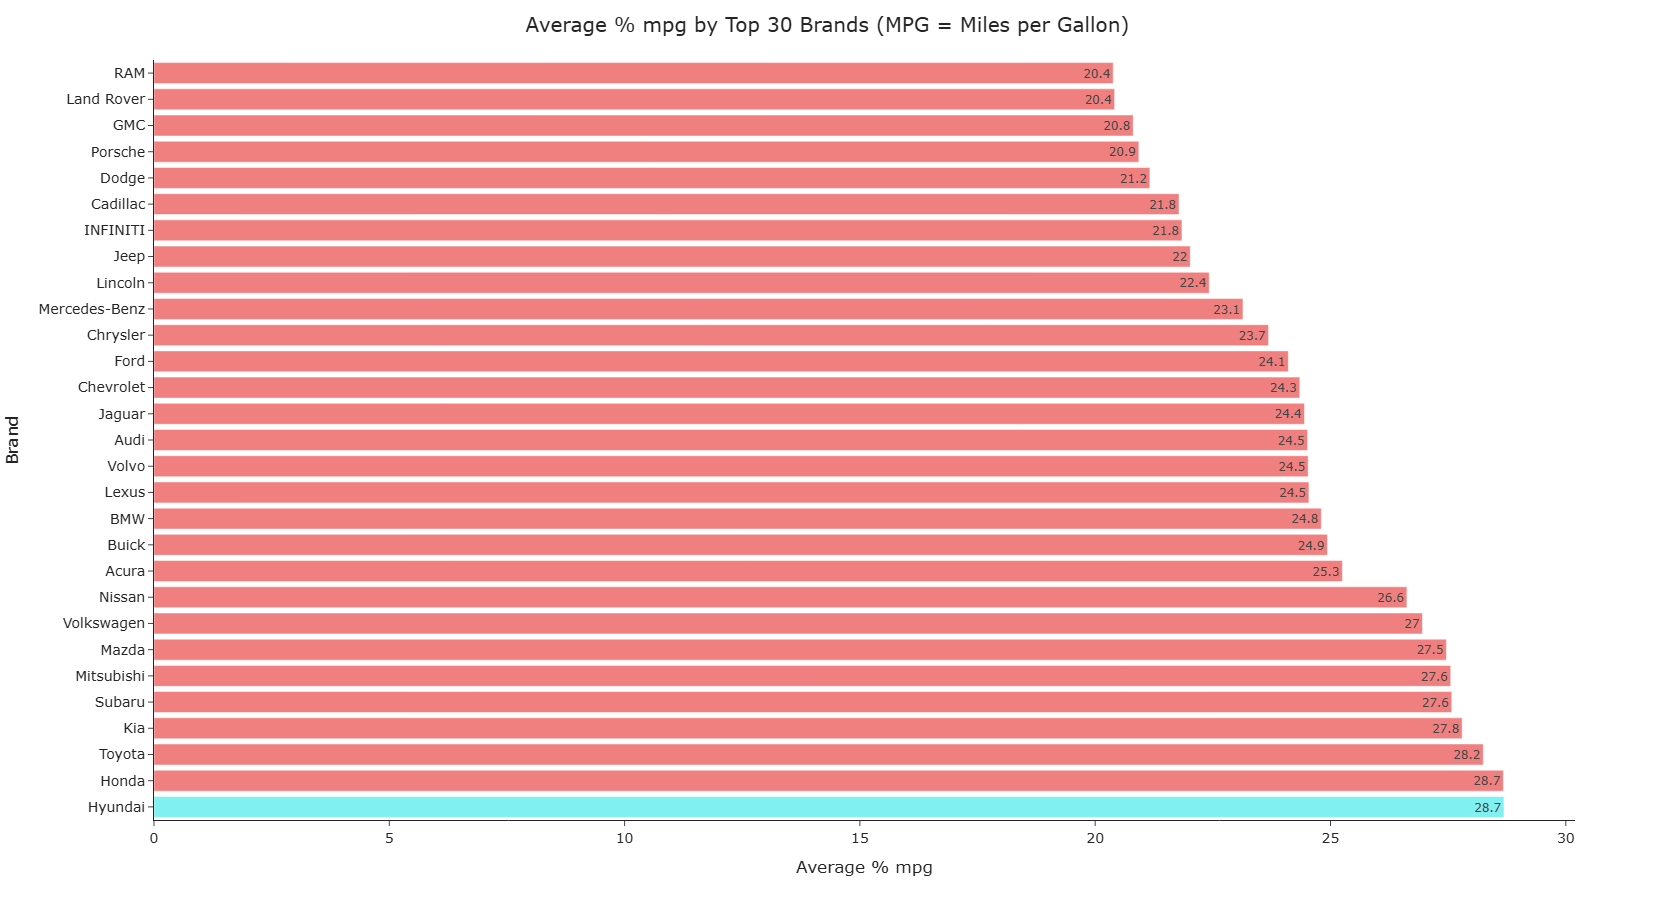

In [ ]:
mpg_of_brand = data.groupby('manufacturer')['mpg'].mean().sort_values(ascending=False).head(29)

color = ['#f08080']*30
color[0] = '#80f0f0'

fig = px.bar(
    x=mpg_of_brand.values,
    y=mpg_of_brand.index,
    orientation='h',
    text = mpg_of_brand.values.round(1),
    template="simple_white"
)

fig.update_layout(
    yaxis_title="Brand",
    xaxis_title="Average % mpg",
    showlegend=False,
    height=900,
    width=1400,
    font=dict(size=14),
    title={
        'text': "Average % mpg by Top 30 Brands (MPG = Miles per Gallon)",
        'y': 0.98,
        'x': 0.5,
    },
)

fig.update_traces(marker_color=color)   

fig.show()

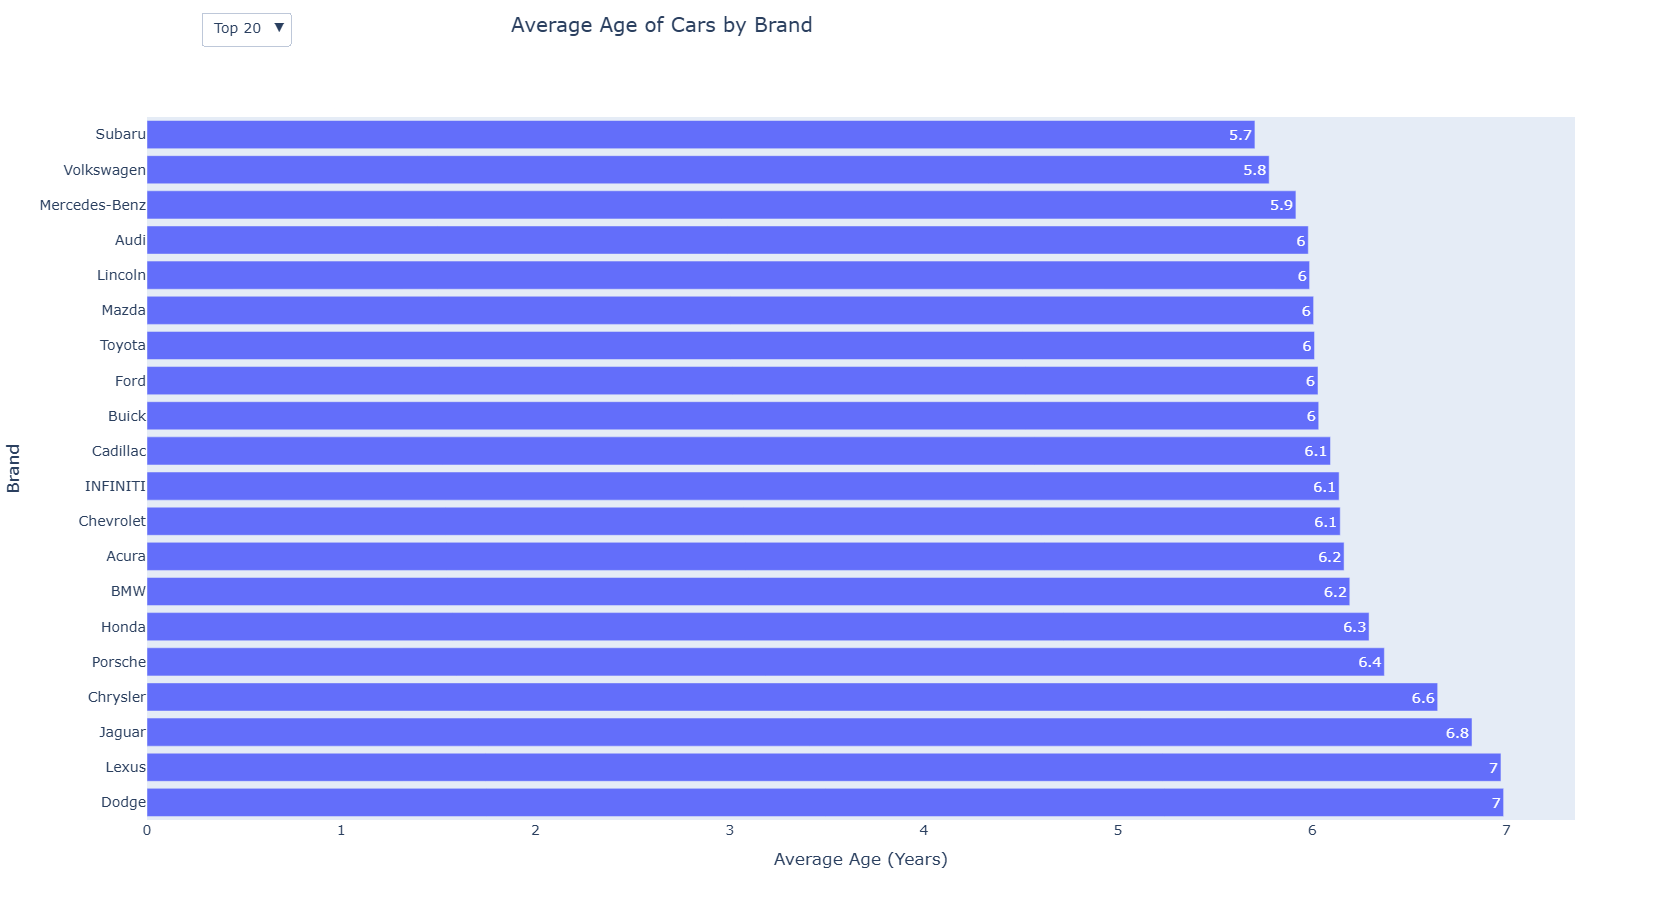

In [ ]:
data['age'] = 2024 - data['year']

data_2000 = data[data['year'] > 2000]

avg_age_by_brand = data_2000.groupby('manufacturer')['age'].mean().sort_values(ascending=False)

top_options = [20, 15, 10, 30]
traces = []

for top_n in top_options:
    subset = avg_age_by_brand.head(top_n)
    trace = go.Bar(
        x=subset.values,
        y=subset.index,
        orientation='h',
        name=f'Top {top_n}',
        text=subset.values.round(1),
        # textposition='auto',
        visible=(top_n == 20)  
    )
    traces.append(trace)

buttons = [
    dict(label=f'Top {n}',
         method='update',
         args=[{'visible': [i == idx for i in range(len(top_options))]},
               {'title': f'Average Age of Cars (Top {n} Brands)'}])
    for idx, n in enumerate(top_options)
]

fig = go.Figure(data=traces)

fig.update_layout(
    updatemenus=[dict(
        type="dropdown",
        direction="down",
        buttons=buttons,
        y=1.15,
        x=0.1,
        showactive=True
    )],
    yaxis_title="Brand",
    xaxis_title="Average Age (Years)",
    showlegend=False,
    height=900,
    width=1200,
    font=dict(size=14),
    title={
        'text': "Average Age of Cars by Brand",
        'y': 0.98,
        'x': 0.4
    }
)
fig.show()

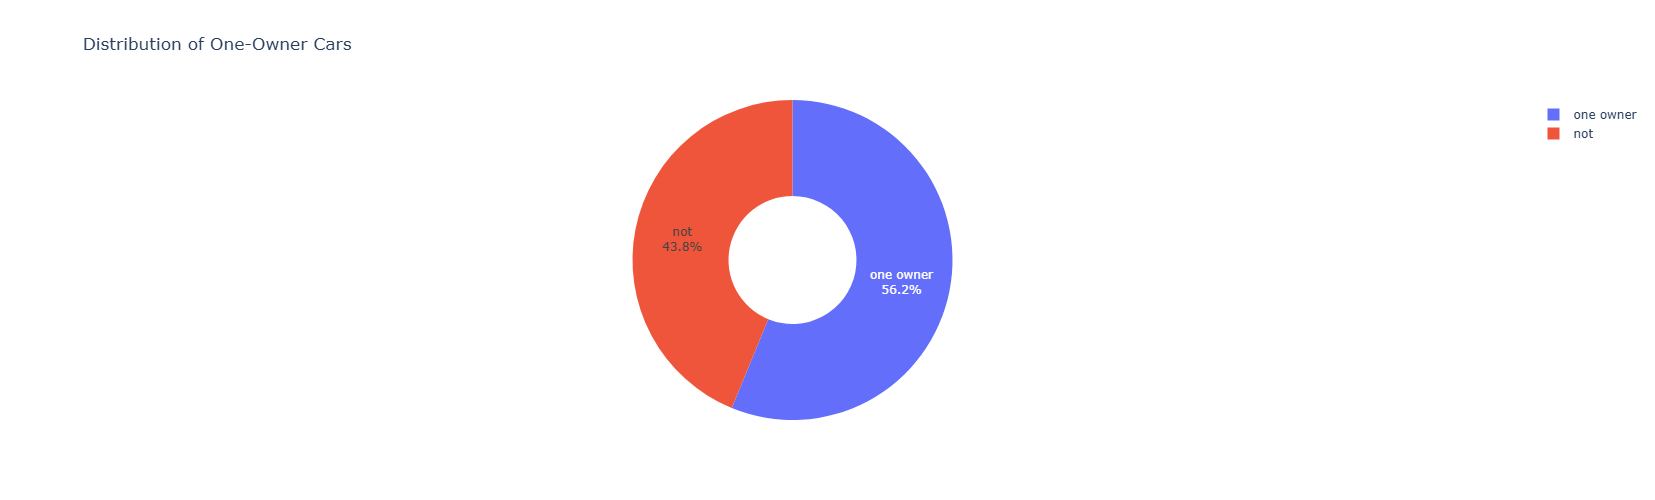

In [ ]:
one_owner_ratio = data['one_owner'].value_counts(normalize=True)

label_names = ['one owner','Not']

import plotly.express as px

fig = px.pie(
    names = label_names,
    values=one_owner_ratio.values,
    title='Distribution of One-Owner Cars',
    hole=0.4
)
fig.update_layout(
    height=500,
    width=500,
)
fig.update_traces(textinfo='percent+label')
fig.show()


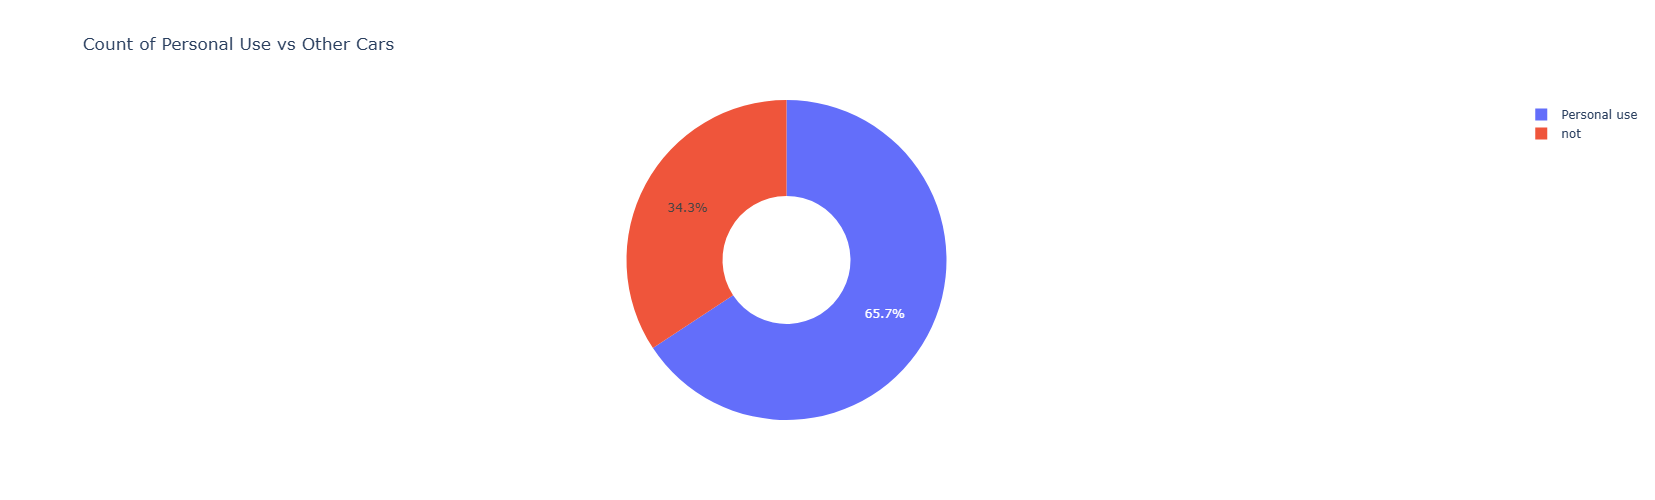

In [ ]:
personal_use_ratio = data['personal_use_only'].value_counts(normalize=True)

label_names = ['Personal use','Not']

fig = px.pie(
    names = label_names,
    values=personal_use_ratio.values,
    title='Count of Personal Use vs Other Cars',
    hole=0.4
)
fig.update_layout(
    height = 500,
    width = 500,
)
fig.show()

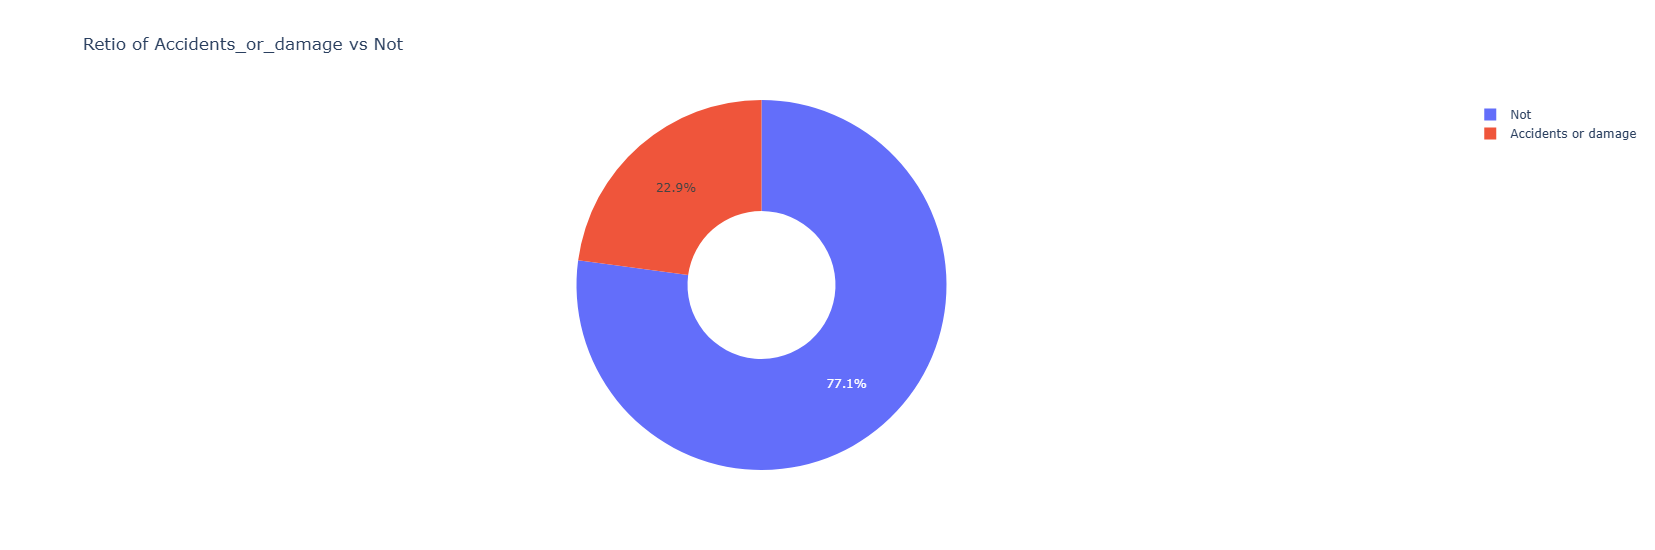

In [ ]:
damage_ratio = data['accidents_or_damage'].value_counts(normalize = True)

label_names = ['Not','Accidents or damage']

fig = px.pie(
    names = label_names,
    values=damage_ratio.values,
    title='Retio of Accidents_or_damage vs Not',
    hole=0.4
)
fig.update_layout(
    height = 550,
    width = 550,
)
fig.show()

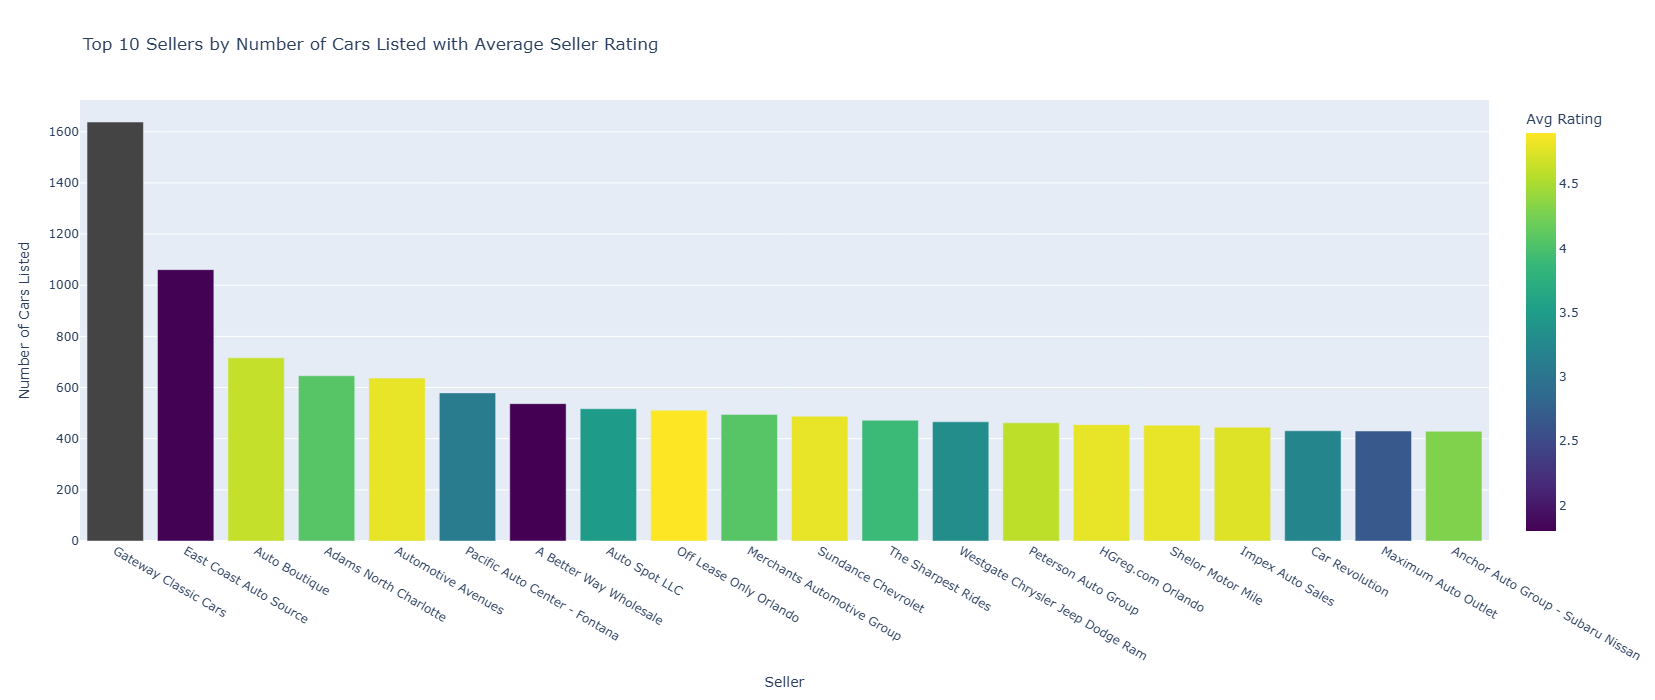

In [ ]:
total_listings = data['seller_name'].value_counts()

average_ratings = (data[data['seller_rating'].notnull()].groupby('seller_name').agg({'seller_rating': 'mean'}))

combined = pd.DataFrame({'total_listings': total_listings}).join(average_ratings)

combined['seller_rating'] = combined['seller_rating'].round(2)

combined_sorted = combined.sort_values(by='total_listings', ascending=False)


top_seller = combined_sorted.head(20).reset_index()

fig = px.bar(
    top_seller,
    x='seller_name',
    y='total_listings',
    color='seller_rating',
    color_continuous_scale='Viridis',
    labels={'seller_name': 'Seller', 'total_listings': 'Number of Cars Listed', 'seller_rating': 'Average Rating'},
    title='Top 10 Sellers by Number of Cars Listed with Average Seller Rating',
)
fig.update_layout(
    height = 700,
    width = 1500,
    showlegend = False
)
fig.update_layout(coloraxis_colorbar=dict(title="Avg Rating"))

fig.show()


In [ ]:
Dodge_data = data[data['manufacturer'] == 'Dodge']

In [ ]:
Dodge_data['model']

165030              Aspen
165031         Caravan SE
165032        Caravan SXT
165033      Caravan Cargo
165034         Caravan SE
               ...       
190275    Durango GT Plus
190276        Durango R/T
190277    Durango Limited
190278        Durango SXT
190279         Durango GT
Name: model, Length: 25250, dtype: object

In [ ]:
tesla_data = data[data['manufacturer'] == 'Tesla']
tesla_data.count()

manufacturer           5883
model                  5883
year                   5883
mileage                5883
engine                 5847
transmission           5883
drivetrain             5883
fuel_type              5873
mpg                       0
accidents_or_damage    5359
one_owner              5347
personal_use_only      5359
seller_rating          4206
driver_rating          5517
driver_reviews_num     5883
price_drop             3463
price                  5883
price_drop_pct         3463
dtype: int64

In [ ]:
Gateway_Classic_Cars_data = data[data['seller_name']=='Gateway Classic Cars']
Gateway_Classic_Cars_data

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price,age,top_sellers
11288,Audi,Q7 3.0T Premium,2017,97123.0,V6 Cylinder Engine,8spd automatic,AWD,Gasoline,22.0,1.0,0.0,1.0,Gateway Classic Cars,NaN,4.7,72.0,4000.0,42000.0,7,NaN
17208,Audi,TT 2.0T,2014,60209.0,"2L I-4 gasoline direct injection, DOHC, variab...",Automatic,AWD,Gasoline,26.5,0.0,0.0,1.0,Gateway Classic Cars,NaN,4.1,6.0,6000.0,35000.0,10,NaN
22985,Audi,S6 5.2 Prestige,2011,33380.0,"5.2L V-10 gasoline direct injection, DOHC, var...",Automatic,AWD,Gasoline,16.5,0.0,0.0,1.0,Gateway Classic Cars,NaN,5.0,1.0,1000.0,35000.0,13,NaN
27022,BMW,650 650Ci,2006,69104.0,"4.8L V-8 DOHC, Double VANOS variable valve con...",6 Speed Automatic,RWD,Gasoline,18.0,0.0,0.0,0.0,Gateway Classic Cars,NaN,4.7,19.0,NaN,14500.0,18,NaN
28226,BMW,M6 Base,1988,89091.0,3.5L F DOHC I6,5 Speed Manual,Unknown,NaN,NaN,0.0,0.0,1.0,Gateway Classic Cars,NaN,NaN,0.0,6000.0,70000.0,36,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741540,Volkswagen,Karmann Ghia,1971,81097.0,4 Cyl 1600 cc,4-speed Manual,Unknown,NaN,NaN,0.0,NaN,1.0,Gateway Classic Cars,NaN,4.4,3.0,NaN,33000.0,53,NaN
741542,Volkswagen,Karmann Ghia,1971,29000.0,Electric,4-Spd Manual,Unknown,NaN,NaN,0.0,NaN,1.0,Gateway Classic Cars,NaN,4.4,3.0,1000.0,62000.0,53,NaN
755336,Volvo,240 DL,1988,120321.0,I-4 B-23,4 Speed Automatic,Unknown,NaN,NaN,NaN,NaN,NaN,Gateway Classic Cars,NaN,4.6,1.0,NaN,11500.0,36,NaN
755337,Volvo,240,1992,138802.0,2.3L I-4 engine with 114HP,Automatic,Unknown,Gasoline,24.5,0.0,0.0,1.0,Gateway Classic Cars,NaN,4.4,4.0,5000.0,16500.0,32,NaN
